# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import requests
import os
import json
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Extraction du fichier twitter-archive-enhanced 
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# requete web pour obtenir le fichier de prediction d'image
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# creation du dossier image_prediction
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# ouverture du dossier et ecriture du fichier
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file : 
    file.write(response.content) 

In [6]:
# creation du dataframe de prediction d'image
df_img_prediction = pd.read_csv('image_prediction/image-predictions.tsv', sep ='\t')
df_img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

In [7]:
# creation du dataframe de tweets
df_tweet = pd.read_json('tweet-json.txt', lines =True)
df_tweet.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
# Affichage du dataframe df_archive
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# Observation des colonnes du dataframe df_archive et du nombre de valeurs
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Observation des valeurs de numerateur du score
df_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [11]:
# Observation des valeurs du denominateur
df_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [12]:
# Observations des valeurs de la colonne doggo
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
# Observations des valeurs de la colonne pupper
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [14]:
# Observations des valeurs de la colonne puppo
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [15]:
# Observations des valeurs de la colonne floofer
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
# Affichage du dataframe df_img_prediction
df_img_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
# Observations des informations de colonnes de df_img_prediction
df_img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# Affichage du dataframe df_tweet
df_tweet

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [19]:
# observation des informations de colonne 
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [20]:
df_tweet.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [21]:
print((df_tweet.possibly_sensitive==df_tweet.possibly_sensitive_appealable).value_counts())

True     2211
False     143
dtype: int64


In [22]:
df_tweet.possibly_sensitive_appealable.value_counts()

0.0    2211
Name: possibly_sensitive_appealable, dtype: int64

### Quality issues
1. Par une evaluation visuelle nous avons observe que les colonnes 'in_reply_to_status_id','in_reply_to_user_id' du jeu de donnnees df_archive ont des valeurs manquantes __(issue 1)__

2. Apres avoir effectue un value count sur les nominateur et denominateur de score dans le datframe df_archive, on constate que les denominateur ne sont pas tous a 10 ainsi, les notes ne sont pas dans un format uniforme __(issue 9)__

3. Apres l'utilisation de la fonction info sur le dataframe df_tweet on constate que les colonnes 'geo','contributors','coordinates' du dataframe df_tweet sont vides et 'place'n'a qu'une seule valeur __(issue 3)__

4. Apres l'utilisation de la fonction describe sur le dataframe df_tweet on constate que  les colonnes 'possibly_sensitive' et 'possibly_sensitive_appealable'  du dataframe df_tweet ont toutes leurs valeurs a 0.0 __(issue 4)__

5. la colonne 'timestamp' du dataframe df_archive est de type object __(issue 8)__

6. Etant donnee que nous observons juste les tweets originaux et non les retweets les colonnes 'retweeted_status_id', 'retweeted_status_user_id' et 'retweeted_status_timestamp' ne sont pas utiles pour nos observations. __(issue 2)__

7. En observant le dataframe df_tweet on a les colonnes id et id_str qui semblent representer la meme information __(issue 5)__

8. En utilisant la fonction info() sur le dataframe df_tweet on voit que les colonnes 'quoted_status', 'quoted_status_id'et 'quoted_status_id_str' du dataframe df_tweet representent la meme information et ont trop de valeurs manquantes __(issue 7)__

### Tidiness issues
1. En effectuant un value_counts sur les colonnes 'fluffer', 'pupper','puppo' et 'doggo' on constate que ces colonnes ont ete pivotees __(issue 6)__

2. visuellement on observe que la colonne 'tweet_id' n'existe pas dans le dataframe df_tweet. __(issue 10)__

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
df_archive_copy = df_archive.copy()
df_img_prediction_copy = df_img_prediction.copy()
df_tweet_copy = df_tweet.copy()

### Issue #1: 
les colonnes 'in_reply_to_status_id','in_reply_to_user_id' du jeu de donnnees df_archive ont des valeurs manquantes

#### Define: 
Il s'agit d'un probleme de valeurs maquantes. Etant donne que nous ne pouvons pas deviner les valeurs qui manquent dans ces colonnes nosu allons les supprimer

#### Code

In [24]:
# suppression des colonnes
df_archive_copy.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id'], inplace = True)

#### Test

In [25]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2:
les colonnes de retweets dans nos jeux de donnees ne sont pas utiles pour nos observations.

#### Define
Les observations que nous devons faire portent sur les tweets originaux et non les retweets. Nous allons supprimer les lignes et les colonnes de retweets.

#### Code

In [26]:
#supprimer les lignes de retweets dans le dataset archive
df_archive_copy = df_archive_copy[df_archive_copy['retweeted_status_id'].isna()]

#supprimer les colonnes de retweets
df_archive_copy.drop(columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace = True)

#supprimer les lignes de retweets dans le dataset tweet
df_tweet_copy = df_tweet_copy[df_tweet_copy['retweeted_status'].isna()]

#supprimer les colonnes de retweets
df_tweet_copy.drop(columns = ['retweeted_status'], inplace = True)

#### Test

In [27]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [28]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2175 non-null datetime64[ns]
display_text_range               2175 non-null object
entities                         2175 non-null object
extended_entities                1994 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null bool
full_text                        2175 non-null object
geo                              0 non-null float64
id                               2175 non-null int64
id_str                           2175 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

### Issue #3:
les colonnes 'geo','contributors','coordinates' du dataframe df_tweet sont vides et 'place' n'a qu'une valeur

#### Define
Supprimer les colonnes 'geo', 'contributors', 'coordinates' et 'place'

#### Code

In [29]:
df_tweet_copy.drop(columns = ['geo','contributors','coordinates','place'], inplace = True)

#### Test

In [30]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 26 columns):
created_at                       2175 non-null datetime64[ns]
display_text_range               2175 non-null object
entities                         2175 non-null object
extended_entities                1994 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null bool
full_text                        2175 non-null object
id                               2175 non-null int64
id_str                           2175 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2175 non-null bool
lang                             2175 non-null object
possibly_sensitive               2

### Issue #4: 
 les colonnes 'possibly_sensitive' et 'possibly_sensitive_appealable' du dataframe df_tweet ont toutes leurs valeurs a 0.0

#### Define
Supprimer les colonnes 'possibly_sensitive' et 'possibly_sensitive_appealable' car elles n'apportent aucune information

#### Code

In [31]:
df_tweet_copy.drop(columns = ['possibly_sensitive','possibly_sensitive_appealable'], inplace = True)

#### Test

In [32]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 24 columns):
created_at                   2175 non-null datetime64[ns]
display_text_range           2175 non-null object
entities                     2175 non-null object
extended_entities            1994 non-null object
favorite_count               2175 non-null int64
favorited                    2175 non-null bool
full_text                    2175 non-null object
id                           2175 non-null int64
id_str                       2175 non-null int64
in_reply_to_screen_name      78 non-null object
in_reply_to_status_id        78 non-null float64
in_reply_to_status_id_str    78 non-null float64
in_reply_to_user_id          78 non-null float64
in_reply_to_user_id_str      78 non-null float64
is_quote_status              2175 non-null bool
lang                         2175 non-null object
quoted_status                28 non-null object
quoted_status_id             28 non-null float64
q

### Issue #5:
les colonnes id et id_str qui semblent representer la meme information

#### Define
Supprimer la colonne id_str

#### Code

In [33]:
df_tweet_copy.drop(columns=['id_str'], inplace = True)

#### Test

In [34]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 23 columns):
created_at                   2175 non-null datetime64[ns]
display_text_range           2175 non-null object
entities                     2175 non-null object
extended_entities            1994 non-null object
favorite_count               2175 non-null int64
favorited                    2175 non-null bool
full_text                    2175 non-null object
id                           2175 non-null int64
in_reply_to_screen_name      78 non-null object
in_reply_to_status_id        78 non-null float64
in_reply_to_status_id_str    78 non-null float64
in_reply_to_user_id          78 non-null float64
in_reply_to_user_id_str      78 non-null float64
is_quote_status              2175 non-null bool
lang                         2175 non-null object
quoted_status                28 non-null object
quoted_status_id             28 non-null float64
quoted_status_id_str         28 non-null float64
r

### Issue #6:
 les colonnes 'fluffer', 'pupper','puppo' et 'doggo' on constate que ces colonnes ont ete pivotees

#### Define
Depivoter ces colonnes dans une nouvelle colonne cuteness_type

#### Code

In [35]:
# On remplace les cellules 'None' par des cellules vides
df_archive_copy[df_archive_copy.loc[:,'doggo':].eq('None')] = np.nan
# On cree la colonne dog_step qui contient les etapes de chaque chien
df_archive_copy['dog_step']= df_archive_copy [df_archive_copy.loc[:,'doggo':].columns].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
#On remplace les cellules vides par 'None'
df_archive_copy['dog_step'].replace('',"None", inplace = True)
# On supprime les colonnes 'doggo', 'floofer', 'pupper' et 'puppo'
df_archive_copy.drop(columns=['doggo','pupper','puppo','floofer'], inplace=True)

#### Test

In [36]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_step
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [37]:
df_archive_copy.dog_step.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_step, dtype: int64

In [38]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_step              2175 non-null object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


### Issue #7:
les colonnes 'quoted_status', 'quoted_status_id'et 'quoted_status_id_str' du dataframe df_tweet representent la meme information et ont trop de valeurs manquantes

#### Define
Supprimer les colonnes ayant trop de valeurs manquantes

#### Code

In [39]:
df_tweet_copy.drop(columns=['quoted_status_id', 'quoted_status', 'quoted_status_id_str'], inplace = True)

#### Test

In [40]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 20 columns):
created_at                   2175 non-null datetime64[ns]
display_text_range           2175 non-null object
entities                     2175 non-null object
extended_entities            1994 non-null object
favorite_count               2175 non-null int64
favorited                    2175 non-null bool
full_text                    2175 non-null object
id                           2175 non-null int64
in_reply_to_screen_name      78 non-null object
in_reply_to_status_id        78 non-null float64
in_reply_to_status_id_str    78 non-null float64
in_reply_to_user_id          78 non-null float64
in_reply_to_user_id_str      78 non-null float64
is_quote_status              2175 non-null bool
lang                         2175 non-null object
retweet_count                2175 non-null int64
retweeted                    2175 non-null bool
source                       2175 non-null object


### Issue #8:
la colonne 'timestamp' du dataframe df_archive est de type object

#### Define
Changer le type de la colonne timestamp

#### Code

In [41]:
df_archive_copy['timestamp']= pd.to_datetime(df_archive_copy['timestamp'], infer_datetime_format = True)

#### Test

In [42]:
df_archive_copy.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
dog_step                      object
dtype: object

### Issue #9:
les denominateurs de notes ne sont pas tous a 10.

#### Define
Evaluer le ratio numerateur/denominateur et corriger les champs qui ne sont pas notes sur 10.

#### Code

In [43]:
# creation de la colonne rating_score
df_archive_copy['rating_score'] = df_archive_copy.loc[:,'rating_numerator']/df_archive_copy.loc[:,'rating_denominator']
# Enregistrement de l'index des lignes ayant un denominateur errone
indexes = df_archive_copy.query('rating_denominator != 10').index
# Modification des valeurs de numerateur et de denominateur
for index in indexes :
    df_archive_copy.loc[index, 'rating_denominator'] = 10
    df_archive_copy.loc[index, 'rating_numerator'] = df_archive_copy.loc[index, 'rating_score']*10

#### Test

In [44]:
df_archive_copy.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_step,rating_score


### Issue #10:
La colonne 'tweet_id' n'existe pas dans le dataframe df_tweet

#### Define
Cette colonne etant importante pour pouvoir joindre ce dataframe aux deux autres nous devront la creer. etant donnee qu'il existe une colonne 'id' dans le dataframe qui correspond a l'id de tweet, nous allons renommer cette colonne en 'tweet_id'

#### Code

In [45]:
df_tweet_copy.rename(columns ={'id':'tweet_id'}, inplace = True)

#### Test

In [46]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 20 columns):
created_at                   2175 non-null datetime64[ns]
display_text_range           2175 non-null object
entities                     2175 non-null object
extended_entities            1994 non-null object
favorite_count               2175 non-null int64
favorited                    2175 non-null bool
full_text                    2175 non-null object
tweet_id                     2175 non-null int64
in_reply_to_screen_name      78 non-null object
in_reply_to_status_id        78 non-null float64
in_reply_to_status_id_str    78 non-null float64
in_reply_to_user_id          78 non-null float64
in_reply_to_user_id_str      78 non-null float64
is_quote_status              2175 non-null bool
lang                         2175 non-null object
retweet_count                2175 non-null int64
retweeted                    2175 non-null bool
source                       2175 non-null object


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

### Mise a jour des donnees

In [50]:
df_archive = df_archive_copy
df_img_prediction = df_img_prediction_copy
df_tweet = df_tweet_copy

In [51]:
df_master = pd.merge(df_archive, df_img_prediction)

In [52]:
df_master = pd.merge(df_master, df_tweet)

In [53]:
df_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [54]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [55]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 39 columns):
tweet_id                     1994 non-null int64
timestamp                    1994 non-null object
source                       1994 non-null object
text                         1994 non-null object
expanded_urls                1994 non-null object
rating_numerator             1994 non-null float64
rating_denominator           1994 non-null int64
name                         1994 non-null object
dog_step                     1994 non-null object
rating_score                 1994 non-null float64
jpg_url                      1994 non-null object
img_num                      1994 non-null int64
p1                           1994 non-null object
p1_conf                      1994 non-null float64
p1_dog                       1994 non-null bool
p2                           1994 non-null object
p2_conf                      1994 non-null float64
p2_dog                       1994 non-null b

In [56]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_step,rating_score,...,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,retweet_count,retweeted,truncated,user
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,1.3,...,NaN,NaN,NaN,NaN,False,en,8853,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,1.3,...,NaN,NaN,NaN,NaN,False,en,6514,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,1.2,...,NaN,NaN,NaN,NaN,False,en,4328,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,1.3,...,NaN,NaN,NaN,NaN,False,en,8964,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,1.2,...,NaN,NaN,NaN,NaN,False,en,9774,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [57]:
df_master.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_step,rating_score,...,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,retweet_count,retweeted,truncated,user
1989,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,None,0.5,...,NaN,NaN,NaN,NaN,False,en,41,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1990,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,None,0.6,...,NaN,NaN,NaN,NaN,False,en,147,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,None,0.9,...,NaN,NaN,NaN,NaN,False,en,47,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1992,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,None,0.7,...,NaN,NaN,NaN,NaN,False,en,48,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1993,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10,None,None,0.8,...,NaN,NaN,NaN,NaN,False,en,532,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Insights:
1. Le nouveau dataframe a 1994 lignes qui correspond au nombre de lignes le moins élevé. Il existe encore des champs vide donc il faut proceder a un nouveau nettoyage par exemple, La colonne timestamp est de nouveau de type object.

2. Notre nouveau jeu de données s'étant du 16-11-2015 au 01-08-2017. 

3. Notre nouveau jeu de donnees nous permet de faire des analyses par image sur les tweets

### Visualization

Text(0.5,1,'ratio des etapes de chiens')

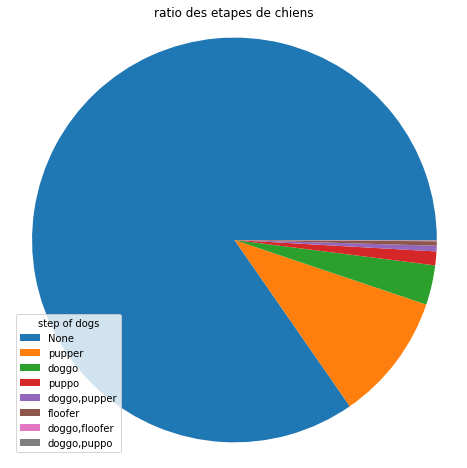

In [58]:
fig, ax = plt.subplots(figsize =(8,8))
ax.pie(df_master.dog_step.value_counts())
ax.axis('equal')
ax.legend(df_master.dog_step.value_counts().index, title ='step of dogs', loc = 'lower left')
ax.set_title('ratio des etapes de chiens')